In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import KMeans
# tf.debugging.set_log_device_placement(True)
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
# Define function for image rotation
def rotate(image, angle):
    # Get image height, width
    (h, w) = image.shape[:2]

    # Calculate the center of the image
    center = (w / 2, h / 2)

    # Rotate the image by the specified angle
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

# Define function for image noising
def add_noise(image, sigma):
    # Generate Gaussian noise
    noise = np.random.normal(0, sigma, image.shape)

    # Add the noise to the image
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)

    return noisy_image

In [3]:
## LOAD DATA
# Define the path to dataset folder
dataset_folder = 'subset/images/2023-04-25/3'
partition = {}
# Iterate through each file in the dataset folder
train_partition = []
for filename in os.listdir(dataset_folder):
    train_partition.append(filename.split('.')[0])
    # image_path = os.path.join(dataset_folder, filename)
partition['train']=train_partition

In [4]:
# ## LOAD DATA
# # Define the path to dataset folder
# dataset_folder = 'subset/images/2023-04-25/3'

# # Create empty list to store images
# roi_RGB,roi_GRAY,roi_HSV = [],[],[]

# HEIGHT = 128
# WIDTH = 128

# # Iterate through each file in the dataset folder
# for filename in os.listdir(dataset_folder):
#     image_path = os.path.join(dataset_folder, filename)

#     # Load the image
#     roi = cv2.imread(image_path)

#     # # Get image dimensions
#     # height, width = img_gray.shape[:2]

#     # # Define the rotation angle in degrees
#     # angle = 180

#     # # Define the rotation center
#     # center = (width / 2, height / 2)

#     # # Perform the rotation
#     # M = cv2.getRotationMatrix2D(center, angle, 1)
#     # rotated_img = cv2.warpAffine(img_gray, M, (width, height))

#     # Define the region of interest (ROI) to crop
#     # x1, y1, x2, y2 = 149, 637,1033,1155
#     # roi = img[y1:y2, x1:x2]
            
#     # Resize the image
#     img_resized = cv2.resize(roi, (HEIGHT,WIDTH))

#     # Append the image to the list of images
#     roi_RGB.append(img_resized)

#     #HSV conversion
#     roi_HSV.append(cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV))

#     #Grayscale conversion
#     roi_GRAY.append(cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY))

In [5]:
# import pandas as pd
# #features extraction
# features = []
# for img in roi_HSV:
#     H_val,S_val,V_val = img[:,:,0],img[:,:,1],img[:,:,2]
#     # Extract the mean values of hue, saturation, and value
#     H_mean = np.mean(H_val)
#     S_mean = np.mean(S_val)
#     V_mean = np.mean(V_val)
#     # Extract the standard deviation of hue, saturation, and value
#     H_std = np.std(H_val)
#     S_std = np.std(S_val)
#     V_std = np.std(V_val)
#     # Extract the contrast values of hue, saturation, and value
#     # H_max,S_max,V_max = np.max(H_val),np.max(S_val),np.max(V_val)
#     # H_min,S_min,V_min = np.min(H_val),np.min(S_val),np.min(V_val)
#     # H_contrast = (H_max - H_min) / (H_max + H_min)
#     # S_contrast = (S_max - S_min) / (S_max + S_min)
#     # V_contrast = (V_max - V_min) / (V_max + V_min)
#     features.append([H_mean,H_std,S_mean,S_std,V_mean,V_std])
# features = pd.DataFrame(features,columns=['H_mean','H_std','S_mean','S_std','V_mean','V_std'])

In [7]:
from pca import pca
from classes import extract_HSV_features
HEIGHT = 128
WIDTH = 128
features = extract_HSV_features(f'{dataset_folder}/',HEIGHT,WIDTH,partition['train'])
# Initialize pca to detected outliers
model = pca(normalize=True, detect_outliers=['ht2', 'spe'], n_std=2  )
# Fit and transform pca
results = model.fit_transform(features)


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [ ]:
# # Plot Hotellings T2
# model.biplot(SPE=False, HT2=True, density=True, title='Outliers marked using Hotellings T2 method.')

# # Make a plot in 3 dimensions
# model.biplot3d(SPE=False, HT2=True, density=False, title='Outliers marked using Hotellings T2 method.')

# # Get the outliers using SPE/DmodX method.
# features.loc[results['outliers']['y_bool'], :]

# # Plot SPE/DmodX method
# model.biplot(SPE=True, HT2=False, title='Outliers marked using SPE/dmodX method.')

# # Make a plot in 3 dimensions
# model.biplot(SPE=True, HT2=True, title='Outliers marked using SPE/dmodX method and Hotelling T2.')

# # Get the outliers using SPE/DmodX method.
# features.loc[results['outliers']['y_bool_spe'], :]

<Axes: >

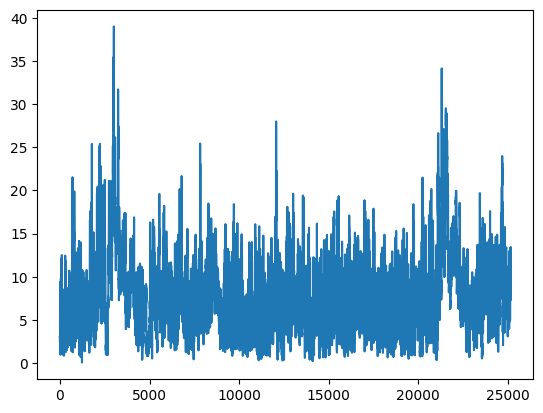

In [8]:
results['outliers'].y_score.plot()

<Axes: >

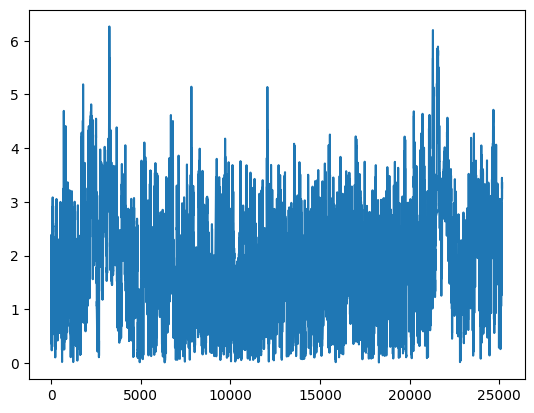

In [9]:
results['outliers'].y_score_spe.plot()

In [ ]:
# ## DATA Augmentation

# # Define rotation angle in degrees
# angle = 90

# # Define standard deviation of the Gaussian noise
# sigma = 30

# # Augment the dataset by rotation and noising
# # images_flipped = np.array([cv2.flip(image, 0) for image in roi_GRAY])
# # images_noisy = np.array([add_noise(image, sigma) for image in roi_GRAY])

# # Concatenate the original and augmented datasets
# # X = np.concatenate((roi_GRAY,images_noisy,images_flipped), axis=0)
# # y = np.concatenate((images_origin,images_origin,images_flipped), axis=0)
# # X_train, X_test= train_test_split(images)
# # 
# # X_train = np.reshape(X_train,(len(X_train),128,128))

# X = np.reshape(roi_GRAY,(len(roi_GRAY),HEIGHT,WIDTH,1))
# #Normalize
# X = X.astype("float32") / 255.0
# # y = y.astype("float32") / 255.0


NameError: name 'np' is not defined

In [10]:
from classes import DataGenerator
n_channels = 1

# Define the autoencoder model
input_img = keras.Input(shape=(HEIGHT,WIDTH,n_channels))

# Encoder Layers
x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder Layers
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(n_channels, (3, 3), activation='sigmoid', padding='same')(x)

# Define the SSIM loss function
def ssim_loss(y_true, y_pred):
    ssim_value = tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    return 1.0 - ssim_value

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss=ssim_loss)

# Train the autoencoder
# Generators
# Parameters
params = {'dim': (HEIGHT,WIDTH),
          'batch_size': 64,
        #   'n_classes': 6,
          'n_channels': 1,
          'shuffle': False}

training_generator = DataGenerator(partition['train'],f'{dataset_folder}/', **params)
# validation_generator = DataGenerator(partition['validation'], labels, **params)
autoencoder.fit(training_generator,
                epochs=5,
                batch_size=64,
                shuffle=True)


Epoch 1/5
 46/393 [==>...........................] - ETA: 1:01 - loss: 0.0925

KeyboardInterrupt: 

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        9232      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         1160  

1/1 [==============================] - 0s 23ms/step


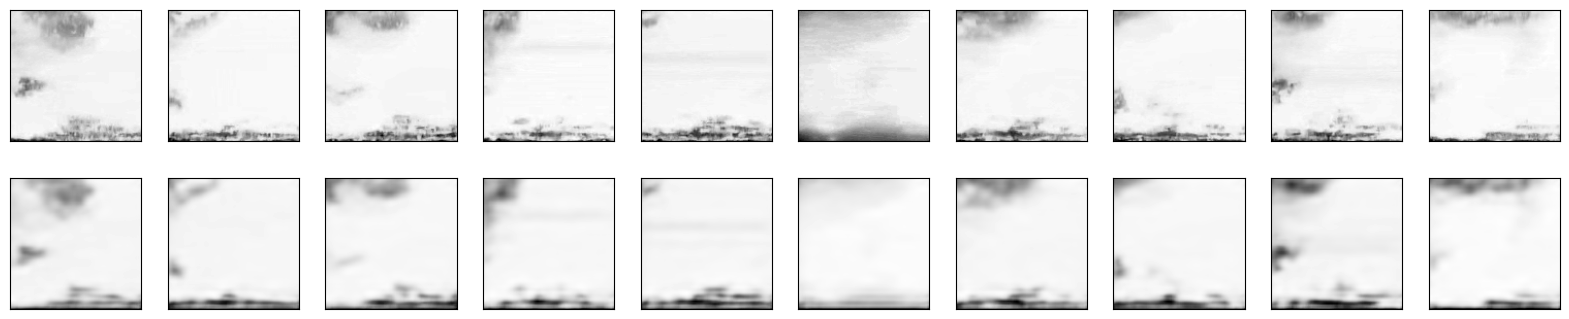

In [ ]:
import random
# decoded_imgs = autoencoder.predict(X)
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    random_img = random.choice(partition['train'])
    img = cv2.imread(f'{dataset_folder}/{random_img}.jpg')
    img = cv2.resize(img, (HEIGHT,WIDTH))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.astype("float32") / 255.0
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image
    ax = plt.subplot(2, n, i + n + 1)
    X = np.reshape(img,(1,HEIGHT,WIDTH,1))
    plt.imshow(np.reshape(autoencoder.predict(X),(HEIGHT,WIDTH,1)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Extract the deep features
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(training_generator)


393/393 [==============================] - 22s 56ms/step


In [ ]:
print(encoded_imgs.shape)
encoded_imgs = encoded_imgs.reshape(len(encoded_imgs), 2048)

(25152, 16, 16, 8)


In [ ]:
# Cluster the encoded images using K-means
kmeans = KMeans(n_clusters=2, random_state=0).fit(encoded_imgs)

# Print the cluster centers
print(kmeans.cluster_centers_)

d:\Programmes\miniconda3\envs\env_master_project\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.30643475 0.         0.08422163 ... 0.18357885 0.2394887  0.25433904]
 [0.23046958 0.         0.1468781  ... 0.16994764 0.27464017 0.27920386]]


C:\Users\nrozo\AppData\Local\Temp\ipykernel_2200\285277098.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne_transformed[kmeans.labels_ == i, 0],


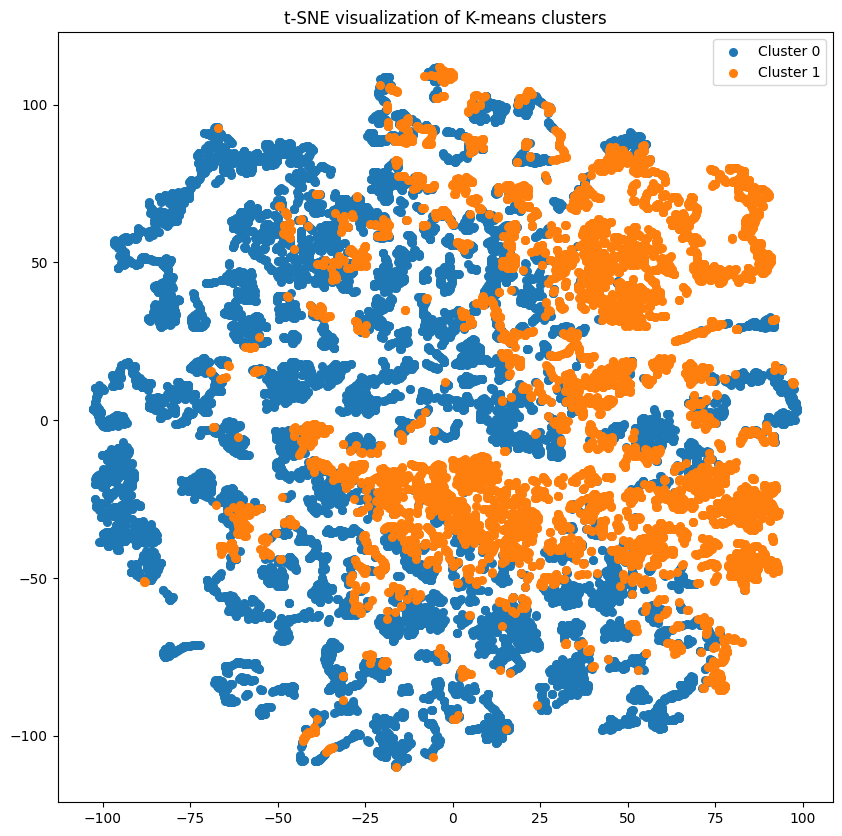

In [ ]:
from sklearn.manifold import TSNE
# Use t-SNE to visualize the clusters
tsne = TSNE(n_components=2, random_state=0)
tsne_transformed = tsne.fit_transform(encoded_imgs)

# Plot the clusters
plt.figure(figsize=(10, 10))
colors = plt.cm.tab10(np.linspace(0, 1, 10))
for i in range(2):
    plt.scatter(tsne_transformed[kmeans.labels_ == i, 0],
                tsne_transformed[kmeans.labels_ == i, 1],
                s=30, c=colors[i], label='Cluster %d' % i)
plt.legend()
plt.title('t-SNE visualization of K-means clusters')
plt.show()